In [60]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib import animation
#mpl.rcParams['figure.figsize'] = (10.0, 10.0)
plt.style.use('seaborn')
#%matplotlib inline 

## Analyze Population of districts in India

In [67]:
populationdf = pd.read_csv("./data-files/census-population.csv")
populationdf.drop(['Subdistt', 'Town/Village', 'Ward', 'EB'], axis=1, inplace=True)
print(populationdf.shape)
populationdf.head(3)

(2028, 24)


,State,District,Level,Name,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_06,...,F_SC,P_ST,M_ST,F_ST,P_LIT,M_LIT,F_LIT,P_ILL,M_ILL,F_ILL
0,0,0,India,India,Total,249501663,1210854977,623270258,587584719,164515253,...,97843058,104545716,52547215,51998501,763638812,434763622,328875190,447216165,188506636,258709529
1,0,0,India,India,Rural,168612897,833748852,427781058,405967794,121322865,...,74732561,94083844,47263733,46820111,482793835,281361374,201432461,350955017,146419684,204535333
2,0,0,India,India,Urban,80888766,377106125,195489200,181616925,43192388,...,23110497,10461872,5283482,5178390,280844977,153402248,127442729,96261148,42086952,54174196


In [68]:
populationdf.head(10)

,State,District,Level,Name,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_06,...,F_SC,P_ST,M_ST,F_ST,P_LIT,M_LIT,F_LIT,P_ILL,M_ILL,F_ILL
0,0,0,India,India,Total,249501663,1210854977,623270258,587584719,164515253,...,97843058,104545716,52547215,51998501,763638812,434763622,328875190,447216165,188506636,258709529
1,0,0,India,India,Rural,168612897,833748852,427781058,405967794,121322865,...,74732561,94083844,47263733,46820111,482793835,281361374,201432461,350955017,146419684,204535333
2,0,0,India,India,Urban,80888766,377106125,195489200,181616925,43192388,...,23110497,10461872,5283482,5178390,280844977,153402248,127442729,96261148,42086952,54174196
3,1,0,STATE,JAMMU & KASHMIR,Total,2119718,12541302,6640662,5900640,2018905,...,438759,1493299,776257,717042,7067233,4264671,2802562,5474069,2375991,3098078
4,1,0,STATE,JAMMU & KASHMIR,Rural,1553433,9108060,4774477,4333583,1593008,...,358045,1406833,730075,676758,4747950,2891749,1856201,4360110,1882728,2477382
5,1,0,STATE,JAMMU & KASHMIR,Urban,566285,3433242,1866185,1567057,425897,...,80714,86466,46182,40284,2319283,1372922,946361,1113959,493263,620696
6,1,1,DISTRICT,Kupwara,Total,113929,870354,474190,396164,188798,...,2,70352,36913,33439,439654,282823,156831,430700,191367,239333
7,1,1,DISTRICT,Kupwara,Rural,101930,765625,412038,353587,169588,...,2,68491,35855,32636,374998,238785,136213,390627,173253,217374
8,1,1,DISTRICT,Kupwara,Urban,11999,104729,62152,42577,19210,...,0,1861,1058,803,64656,44038,20618,40073,18114,21959
9,1,2,DISTRICT,Badgam,Total,103363,753745,398041,355704,155202,...,25,23912,12383,11529,335649,207741,127908,418096,190300,227796


No handles with labels found to put in legend.


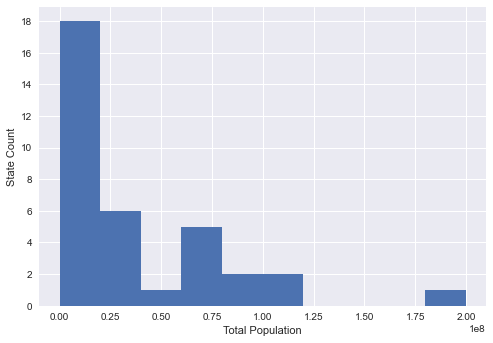

In [69]:
mask1 = populationdf['Level']=='STATE'
mask2 = populationdf['TRU']=='Total'
df = populationdf[mask1 & mask2]

plt.hist(df['TOT_P'])

plt.xlabel('Total Population')
plt.ylabel('State Count')
plt.yticks(np.arange(0,20,2))

plt.grid(True)
plt.legend()

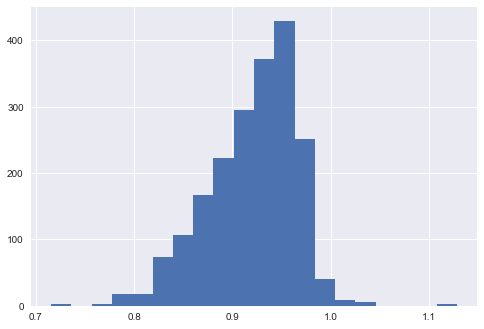

In [71]:
# let's plot the overall distribution of the Child Sex Ratio across all the districts.
plt.hist(populationdf["F_06"]/populationdf["M_06"], bins=20)
plt.show()

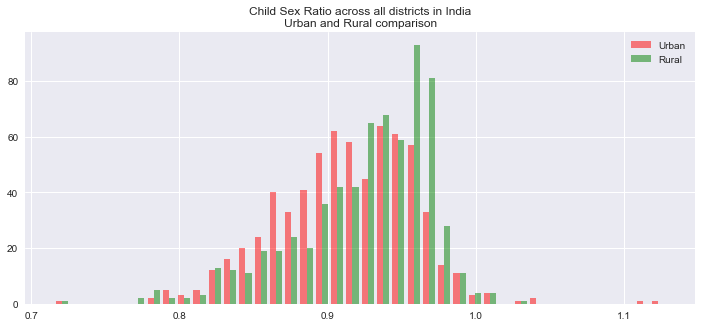

In [72]:
# lets plot histograms to see child sex ratio for rural & urban populations
populationdf['sexratio'] = populationdf['F_06']/populationdf['M_06']
urban = populationdf.loc[populationdf.TRU == 'Urban']
rural = populationdf.loc[populationdf.TRU == 'Rural']

plt.figure(figsize=(12,5))
plt.hist([urban.sexratio, rural.sexratio], bins=40, alpha=0.5, color=['r', 'g'],
         label=['Urban', 'Rural'])
plt.legend()
plt.grid(1)
plt.title("Child Sex Ratio across all districts in India\n" +
          "Urban and Rural comparison")
plt.show()

In [73]:
# interesting - The peak for the rural populations is much closer to one (about 0.96) than for urban populations

# Seaborn has a better represenattion to show the difference between the rural and urban population.

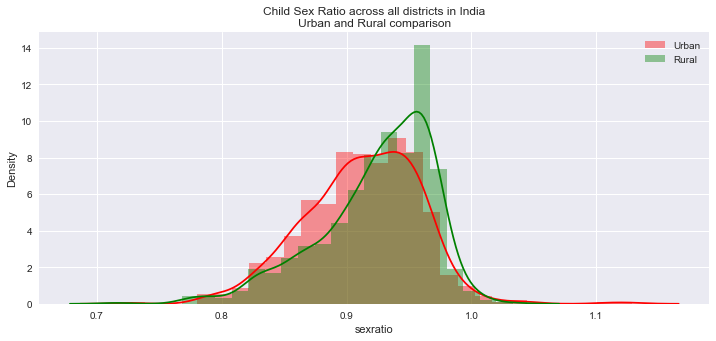

In [74]:
plt.figure(figsize=(12,5))
sns.distplot(urban.sexratio, color='r', label='Urban')
sns.distplot(rural.sexratio, color='g', label='Rural')
plt.title("Child Sex Ratio across all districts in India\n" +
          "Urban and Rural comparison")
plt.legend()
plt.show()

## Analyze NCRB accident data

In [3]:
states = pd.read_csv('data-files/accident-data.csv')
states.drop('num', axis=1, inplace=True)
states.head()

,state/ut,pedestrian-male,pedestrian-female,pedestrian-total,bicycle-male,bicycle-female,bicycle-total,motorcycle-male,motorcycle-female,motorcycle-total,scooter-male,scooter-female,scooter-total,moped-male,moped-female,moped-total,population
0,Andhra Pradesh,1049,202,1251,154,2,156,2204,252,2456,74,17,91,104,11,115,49386799
1,Arunachal Pradesh,0,0,0,1,0,1,27,5,32,8,2,10,0,0,0,1382611
2,Assam,24,0,24,11,0,11,451,26,477,43,19,62,65,10,75,31169272
3,Bihar,161,39,200,115,16,131,755,131,886,24,38,62,18,45,63,103804637
4,Chhattisgarh,41,8,49,21,7,28,1018,103,1121,17,20,37,78,20,98,25540196


In [9]:
# Analyze accident data to see number of pedestrians killed in 2015

def plot(df, col, min_value=50, title=""):
    total_col = '%s-total'%col
    s2 = df.sort_values(by=total_col)

    # for sanity of plot, lets filter and pick few top ones only
    mask = s2[total_col]>min_value
    s2 = s2[mask]
    
    plt.figure(figsize=(8,8))
    plt.barh(range(s2.shape[0]), s2[total_col], tick_label=s2['state/ut'])
    plt.title('Number of %s killed in accidents in 2015\nSource: NCRB Accidents data'%title)
    plt.axes().yaxis.grid(0)
    plt.axes().xaxis.grid(1)
    plt.show()

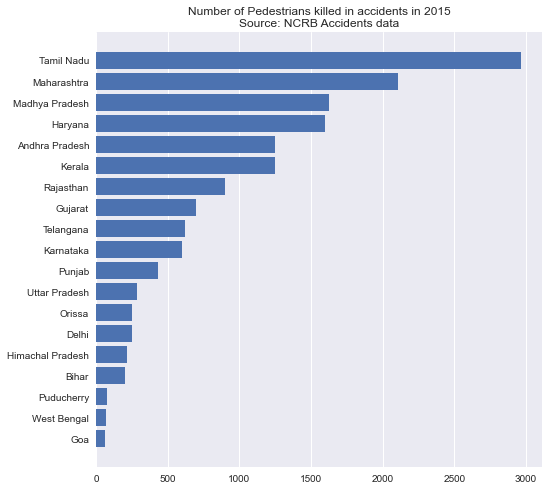

In [10]:
plot(states,'pedestrian', title='Pedestrians')

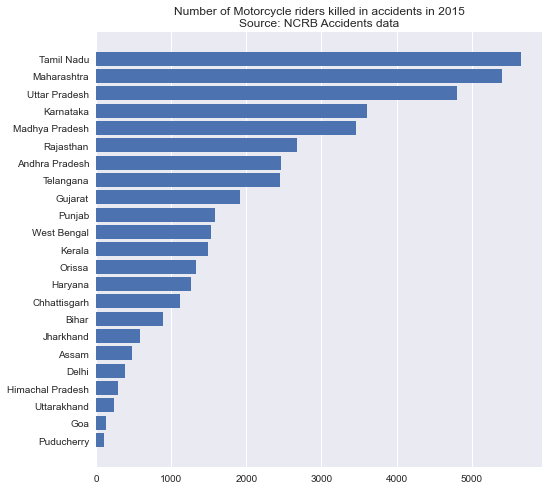

In [11]:
plot(states,'motorcycle', title='Motorcycle riders')

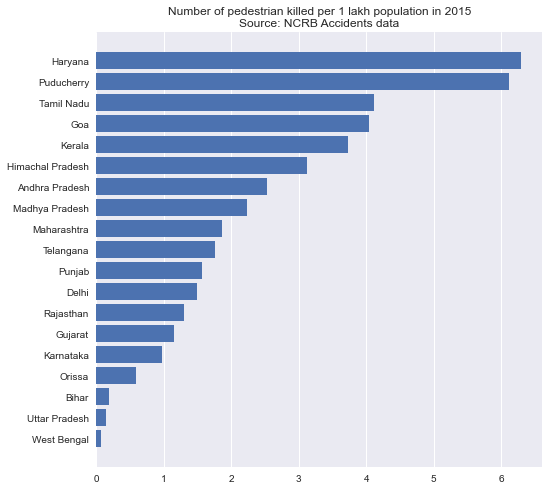

In [15]:
# this wouldnt give a true picture as data needs to be normalized
# Will try pedestrians per 1 lakh population (instead of actual number of pedestrians)

states['perlakh'] = states['pedestrian-total']/states['population']*1e5
states = states.sort_values(by='perlakh')

# filter
mask = states['pedestrian-total'] > 50
states = states[mask]

#plot now
plt.figure(figsize=(8,8))
plt.barh(range(states.shape[0]), states['perlakh'], tick_label=states['state/ut'])
plt.title('Number of pedestrian killed per 1 lakh population in 2015\nSource: NCRB Accidents data')
plt.axes().yaxis.grid(0)
plt.axes().xaxis.grid(1)
plt.show()

In [16]:
# so now the state changed and probably reflects more sensible data!

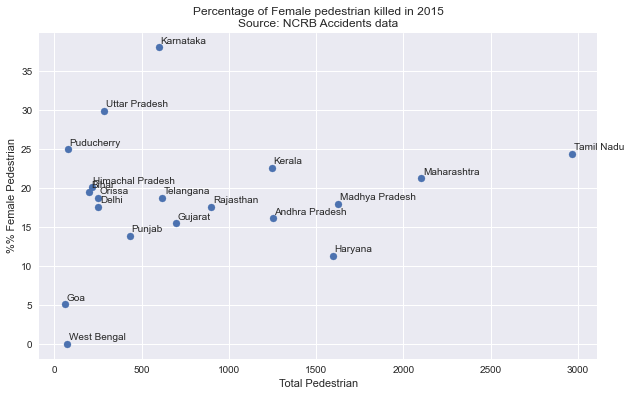

In [39]:
# lets try a scatter plot showing the total pedestrians against the percentage of female pedestrians. 
# Will also try to show State names next to the point.

states_female = states.copy()
states_female = states_female[states_female['pedestrian-total'] > 50]
states_female.reset_index(inplace=True)
states_female['percentfemale'] = states_female['pedestrian-female']/states_female['pedestrian-total']*100

plt.figure(figsize=(10,6))
plt.scatter(states_female['pedestrian-total'], states_female['percentfemale'])
for i in range(states_female.shape[0]):
    x = states_female.loc[i, 'pedestrian-total']
    y = states_female.loc[i, 'percentfemale']
    plt.text(x+10,y+0.5, states_female.loc[i,'state/ut'])
        
plt.title('Percentage of Female pedestrian killed in 2015\nSource: NCRB Accidents data')
plt.xlabel('Total Pedestrian')
plt.ylabel('%% Female Pedestrian')
    
plt.grid(1)
plt.show()

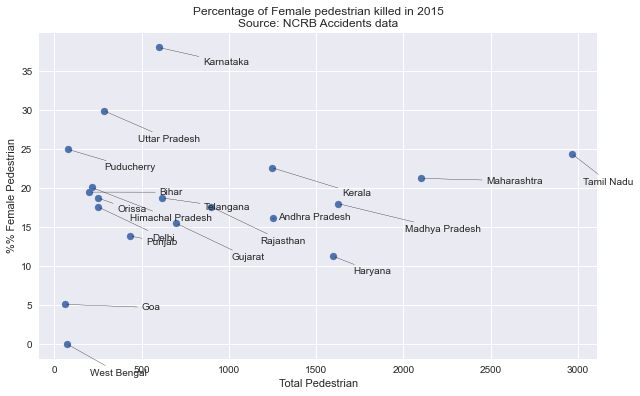

In [57]:
# texts are overlapping - lets try annotation too

states_female = states.copy()
states_female = states_female[states_female['pedestrian-total'] > 50]
states_female.reset_index(inplace=True)
states_female['percentfemale'] = states_female['pedestrian-female']/states_female['pedestrian-total']*100

plt.figure(figsize=(10,6))
plt.scatter(states_female['pedestrian-total'], states_female['percentfemale'])
for i in range(states_female.shape[0]):
    x = states_female.loc[i, 'pedestrian-total']
    y = states_female.loc[i, 'percentfemale']
    
    # annotate
    dx = np.random.rand(1)*450
    dy = np.random.rand(1)*5
    plt.annotate(states_female.loc[i,'state/ut'], (x,y), 
                     xytext=(x+dx,y-dy), arrowprops={'arrowstyle':'-'})
        
plt.title('Percentage of Female pedestrian killed in 2015\nSource: NCRB Accidents data')
plt.xlabel('Total Pedestrian')
plt.ylabel('%% Female Pedestrian')
    
plt.grid(1)
plt.show()


In [58]:
# lets see some correlation using heatmap
states = pd.read_csv('data-files/accident-data.csv')
states.drop('num', axis=1, inplace=True)
states.head()

,state/ut,pedestrian-male,pedestrian-female,pedestrian-total,bicycle-male,bicycle-female,bicycle-total,motorcycle-male,motorcycle-female,motorcycle-total,scooter-male,scooter-female,scooter-total,moped-male,moped-female,moped-total,population
0,Andhra Pradesh,1049,202,1251,154,2,156,2204,252,2456,74,17,91,104,11,115,49386799
1,Arunachal Pradesh,0,0,0,1,0,1,27,5,32,8,2,10,0,0,0,1382611
2,Assam,24,0,24,11,0,11,451,26,477,43,19,62,65,10,75,31169272
3,Bihar,161,39,200,115,16,131,755,131,886,24,38,62,18,45,63,103804637
4,Chhattisgarh,41,8,49,21,7,28,1018,103,1121,17,20,37,78,20,98,25540196


<AxesSubplot:>

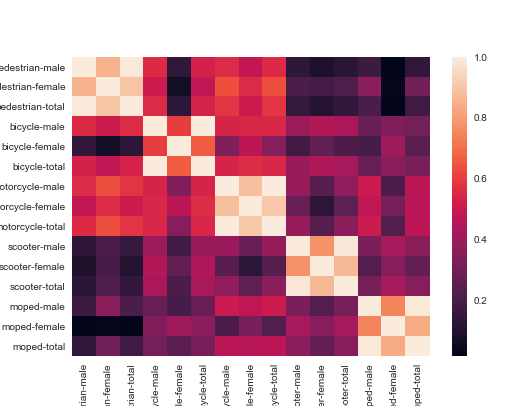

In [61]:
# remove states which have population less than 2 million
states_ratio = states.copy()
states_ratio = states_ratio[states_ratio.population > 2e6]

# Normalize: convert into ratios
for c in states_ratio.columns[1:]:
    states_ratio.loc[:,c] = states_ratio.loc[:,c]/states_ratio.population
    
states_ratio.drop('population', axis=1, inplace=True)

# find correlation
statescorr = states_ratio.corr()

sns.heatmap(statescorr)

## Random Walk or Stock Series

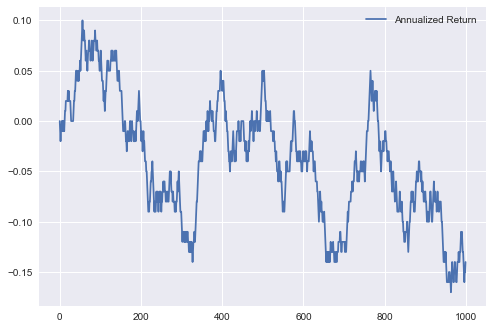

In [65]:
# Generate a random walk series starting at a value of 100
# varying by -1,0 or +1 per day, over 1000 days
def generate_random_walk_series(start=100, n=1000):
    change = np.random.randint(-1,2,n) 
    random_walk = start+change.cumsum()
    return random_walk

# Assuming this as stock price, lets see annualized return
def returnDayN(dayNprice, day0price=100):
    return ((dayNprice-day0price)/day0price)

p1 = generate_random_walk_series()
annualizedReturn = [returnDayN(i) for i in p1]

plt.plot(annualizedReturn)
plt.legend(labels=['Annualized Return'])
plt.grid(True)
plt.show()